### Driveにマウント & Git pull

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [38]:
%cd /content/drive/'My Drive'/'Colab Notebooks'/AnimalCrossingStock

/content/drive/My Drive/Colab Notebooks/AnimalCrossingStock


In [39]:
!git pull

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/toy101/AnimalCrossingStock
   7415b3a..b4249a7  master     -> origin/master
Updating 7415b3a..b4249a7
Fast-forward
 raw_data.csv | 175 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 1 file changed, 175 insertions(+)
 create mode 100644 raw_data.csv


In [0]:
%matplotlib inline
import copy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 前処理(欠損値処理)

In [91]:
data = pd.read_csv('raw_data.csv')
data = data[data.columns.values[2:]]
data.head()

,Mon_fir,Mon_sec,Tue_fir,Tue_sec,Wen_fir,Wen_sec,The_fir,The_sec,Fri_fir,Fri_sec,Sat_fir,Sat_sec
0,85.0,80,75.0,71,67,62.0,58.0,54.0,50.0,46.0,43.0,40.0
1,82.0,77,74.0,70,66,62.0,58.0,55.0,50.0,47.0,44.0,40.0
2,81.0,78,73.0,70,66,63.0,59.0,56.0,52.0,48.0,45.0,42.0
3,87.0,83,78.0,73,69,64.0,60.0,57.0,54.0,51.0,47.0,43.0
4,84.0,81,78.0,73,70,65.0,62.0,59.0,55.0,51.0,48.0,45.0


In [92]:
data.isnull().sum()

Mon_fir    2
Mon_sec    0
Tue_fir    2
Tue_sec    0
Wen_fir    0
Wen_sec    2
The_fir    3
The_sec    2
Fri_fir    4
Fri_sec    5
Sat_fir    8
Sat_sec    9
dtype: int64

In [93]:
data = data.dropna()
print(data.shape)
data.isnull().sum()

(154, 12)


Mon_fir    0
Mon_sec    0
Tue_fir    0
Tue_sec    0
Wen_fir    0
Wen_sec    0
The_fir    0
The_sec    0
Fri_fir    0
Fri_sec    0
Sat_fir    0
Sat_sec    0
dtype: int64

In [94]:
data = data.apply(lambda x: (x-x.mean())/x.std(), axis=0)
data.head()

,Mon_fir,Mon_sec,Tue_fir,Tue_sec,Wen_fir,Wen_sec,The_fir,The_sec,Fri_fir,Fri_sec,Sat_fir,Sat_sec
0,0.157023,0.031281,-0.265259,-0.383104,-0.496841,-0.626442,-0.754877,-0.874791,-0.952994,-0.869550,-0.983259,-1.030527
1,0.038872,-0.082513,-0.293885,-0.397714,-0.510963,-0.626442,-0.754877,-0.859671,-0.952994,-0.853943,-0.962997,-1.030527
2,-0.000511,-0.044582,-0.322512,-0.397714,-0.510963,-0.609371,-0.737375,-0.844551,-0.918535,-0.838336,-0.942734,-0.979300
3,0.235790,0.145075,-0.179380,-0.353882,-0.468597,-0.592299,-0.719872,-0.829432,-0.884076,-0.791514,-0.902209,-0.953687
4,0.117639,0.069212,-0.179380,-0.353882,-0.454475,-0.575227,-0.684868,-0.799192,-0.866846,-0.791514,-0.881947,-0.902460


In [0]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

In [0]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)
              #n_clusters以外はdefaultと同じ値

In [0]:
km.fit(data)
cluster_labels = km.predict(data)

In [56]:
cluster_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 2, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 3, 0, 2, 2, 2, 2,
       0, 2, 3, 0, 3, 0, 2, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 0, 3],
      dtype=int32)

In [0]:
max_cluster = 12;
candidate_cluster = range(2, max_cluster)
intra_sum_of_square_list = []
for k in candidate_cluster:
    km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)
              #n_clusters以外はdefaultと同じ値
    km.fit(data)
    cluster_labels = km.predict(data)
    intra_sum_of_square_list.append(km.inertia_)

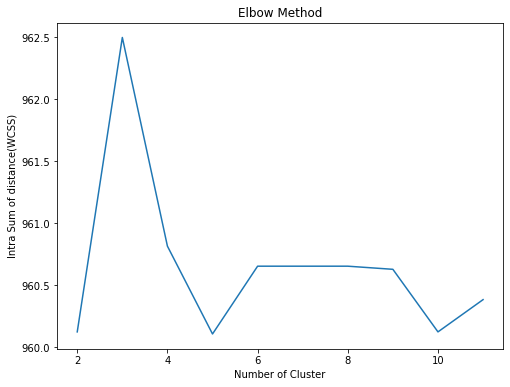

In [98]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Cluster')
ax.set_ylabel('Intra Sum of distance(WCSS)')
plt.plot(candidate_cluster, intra_sum_of_square_list)

In [0]:
from scipy.cluster.hierarchy import linkage, dendrogram

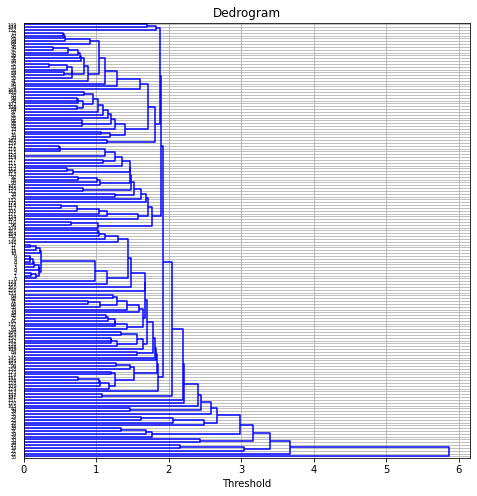

In [96]:
result1 = linkage(data.iloc[:, :], 
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  method= 'single')
                  #method = 'average')
                  #method= 'complete')
                  #method='weighted')
plt.figure(figsize=(8, 8))
dendrogram(result1, orientation='right', labels=list(data.index), color_threshold=0.01)
plt.title("Dedrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()